## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
from IPython.display import Image

## 2. Loading Dataset

In [2]:
df_demographic=pd.read_csv('demographic.csv')

In [3]:
df_demographic.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,...,3.0,4.0,NaN,13281.237386,13481.042095,1,112,4.0,4.0,0.84
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,...,3.0,1.0,1.0,23682.057386,24471.769625,1,108,7.0,7.0,1.78
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,...,4.0,1.0,3.0,57214.803319,57193.285376,1,109,10.0,10.0,4.51
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,...,3.0,1.0,4.0,55201.178592,55766.512438,2,109,9.0,9.0,2.52
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,...,5.0,1.0,5.0,63709.667069,65541.871229,2,116,15.0,15.0,5.00


In [4]:
df_diet=pd.read_csv('diet.csv')

In [5]:
df_diet.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,DRD370QQ,DRD370R,DRD370RQ,DRD370S,DRD370SQ,DRD370T,DRD370TQ,DRD370U,DRD370UQ,DRD370V
0,73557,16888.327864,12930.890649,1,49.0,2.0,2.0,6.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73558,17932.143865,12684.148869,1,59.0,2.0,2.0,4.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0
2,73559,59641.812930,39394.236709,1,49.0,2.0,2.0,18.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,142203.069917,125966.366442,1,54.0,2.0,2.0,21.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,59052.357033,39004.892993,1,63.0,2.0,2.0,18.0,1.0,1.0,...,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0,NaN,2.0


In [6]:
df_examination=pd.read_csv('examination.csv')

In [7]:
df_examination.head()

,SEQN,PEASCST1,PEASCTM1,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,...,CSXLEAOD,CSXSOAOD,CSXGRAOD,CSXONOD,CSXNGSOD,CSXSLTRT,CSXSLTRG,CSXNART,CSXNARG,CSAEFFRT
0,73557,1,620.0,NaN,NaN,1.0,4.0,86.0,1.0,1.0,...,2.0,1.0,1.0,1.0,4.0,62.0,1.0,NaN,NaN,1.0
1,73558,1,766.0,NaN,NaN,1.0,4.0,74.0,1.0,1.0,...,3.0,1.0,2.0,3.0,4.0,28.0,1.0,NaN,NaN,1.0
2,73559,1,665.0,NaN,NaN,1.0,4.0,68.0,1.0,1.0,...,2.0,1.0,2.0,3.0,4.0,49.0,1.0,NaN,NaN,3.0
3,73560,1,803.0,NaN,NaN,1.0,2.0,64.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,1,949.0,NaN,NaN,1.0,3.0,92.0,1.0,1.0,...,3.0,1.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN,1.0


In [8]:
df_labs=pd.read_csv('labs.csv')

In [9]:
df_labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [10]:
df_questionnaire=pd.read_csv('questionnaire.csv')

In [11]:
df_questionnaire.head(5)

,SEQN,ACD011A,ACD011B,ACD011C,ACD040,ACD110,ALQ101,ALQ110,ALQ120Q,ALQ120U,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
0,73557,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,3.0,...,NaN,40.0,270.0,200.0,69.0,270.0,62.0,NaN,NaN,NaN
1,73558,1.0,NaN,NaN,NaN,NaN,1.0,NaN,7.0,1.0,...,NaN,NaN,240.0,250.0,72.0,250.0,25.0,NaN,NaN,NaN
2,73559,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,180.0,190.0,70.0,228.0,35.0,NaN,NaN,NaN
3,73560,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0
4,73561,1.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,...,NaN,NaN,150.0,135.0,67.0,170.0,60.0,NaN,NaN,NaN


We concatenate five dataframes including df_demographic, df_diet, df_examination, df_labs and df_questionnaire.

In [12]:
df=pd.concat([df_demographic, df_diet, df_examination, df_labs, df_questionnaire], axis=1)

In [13]:
df.shape

(10175, 1816)

## 3. Data Cleaning 

In [14]:
null=100*(df.isnull().sum())/(df.shape[0])

We create a dataframe that shows the percentage of null values in each column of df.

In [15]:
df_null=pd.DataFrame({'percentage':null})

In [16]:
df_null.head()

,percentage
SEQN,0.0
SDDSRVYR,0.0
RIDSTATR,0.0
RIAGENDR,0.0
RIDAGEYR,0.0


Now we select the columns that contain more than 70% null values and remove them from df.

In [17]:
df_high=df_null[df_null['percentage']>70]

In [18]:
df_high.head()

,percentage
RIDAGEMN,93.385749
DMQADFC,94.663391
DMDYRSUS,81.248157
DMDEDUC3,72.452088
RIDEXPRG,87.135135


In [19]:
df.drop(list(df_high.index),axis=1, inplace=True)

Now we select the columns that contain object datatypes and remove them from df.

In [20]:
print(df.dtypes.unique())

[dtype('int64') dtype('float64') dtype('O')]


In [21]:
df_type=pd.DataFrame({'type':df.dtypes})

In [22]:
df_object=df_type[df_type['type']=='object']

In [23]:
df_object.head()

,type
OHX02CTC,object
OHX03CTC,object
OHX04CTC,object
OHX05CTC,object
OHX06CTC,object


In [24]:
df_object.shape

(29, 1)

In [25]:
df.drop(list(df_object.index), axis=1,inplace=True)

Then we select the columns that contain between 0.5% and 70% null values, and replace the null values with the mean of each column.

In [26]:
null=100*(df.isnull().sum())/(df.shape[0])

In [27]:
df_null=pd.DataFrame({'percentage':null})

In [28]:
df_medium=df_null[(df_null['percentage']<70) & (df_null['percentage']>0.5)]

In [29]:
for x in list(df_medium.index):
    df[x]=df[x].fillna(df[x].mean())

Fianlly the columns that contain less than 0.5% null values are remained, and we drop the rows of df that contain these null values.

In [30]:
df.dropna(axis=0, inplace=True)

In [31]:
df.shape

(9777, 753)

Now we check whether the dataframe still contains null values.

In [32]:
new=[]
for x in list(df.isnull().sum().values):
    if x!=0:
        print(x)
    else:
        new.append(x)
print(new)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

We can see that all the null values are removed and the data is clean.

In [33]:
print(df.dtypes.unique())

[dtype('float64') dtype('int64')]


## 4. Dimensionality Reduction by Principal Component Analysis (PCA)

The number of columns is 753, therefore, we will use Principal Component Analysis (PCA) as a dimensionality-reduction technique.

### 4.1. Standardizing the Data

In [34]:
ss=StandardScaler()

In [35]:
ss.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaled_df=ss.transform(df)

In [37]:
scaled_df

array([[-1.73125671,  0.        ,  0.18394937, ..., -0.26492534,
        -0.05384303, -0.09106571],
       [-1.73090376,  0.        ,  0.18394937, ..., -0.22887071,
        -0.07800397, -0.09765692],
       [-1.7305508 ,  0.        ,  0.18394937, ..., -0.27213627,
        -0.10458102, -0.09587551],
       ...,
       [ 1.73119541,  0.        , -5.4362786 , ..., -0.25771442,
        -0.0659235 , -0.09854762],
       [ 1.73154836,  0.        ,  0.18394937, ..., -0.33703461,
        -0.2290099 , -0.09462853],
       [ 1.73190131,  0.        ,  0.18394937, ..., -0.32261276,
        -0.19880871, -0.0989039 ]])

In [38]:
scaled_df.shape

(9777, 753)

### 4.2. Finding the Optimal Number of Principal Components 

We try to find the optimal number of components which capture the greatest amount of variance in the data.

In [39]:
pca=PCA()
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In order to increase the resolution, we limit the x axis between 0 and 100.

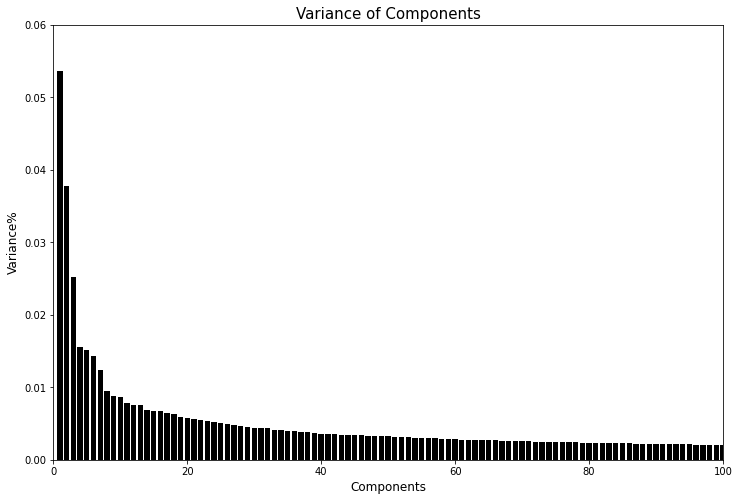

In [40]:
plt.figure(figsize=(12,8))
plt.bar(x=list(range(1,754)), height=pca.explained_variance_ratio_,color='black')
plt.xlabel('Components',fontsize=12)
plt.ylim(0,0.06)
plt.xlim(0,100)
plt.ylabel('Variance%',fontsize=12)
plt.title('Variance of Components',fontsize=15)
plt.show()

There is a variance drop off at Number of components=3, and the first three components explain the majority of the variance in our data. So, we reduce the dimensionality by PCA using only 3 components.

### 4.3. Performing PCA with the Chosen number of components

Now we perform PCA with the with the chosen number of components, 3.

In [41]:
pca=PCA(n_components=3)

In [42]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [43]:
X_pca=pca.transform(scaled_df)

In [44]:
X_pca

array([[-2.03303067, -0.0872589 , -9.97077186],
       [-4.37575374, 17.27544146,  8.1136533 ],
       [-0.63329507,  2.33047302, -3.61340201],
       ...,
       [-2.7026414 ,  4.97135001, -0.48752042],
       [ 0.94840242, -4.66965587,  6.24658778],
       [ 0.09181792,  0.32389105,  6.06647892]])

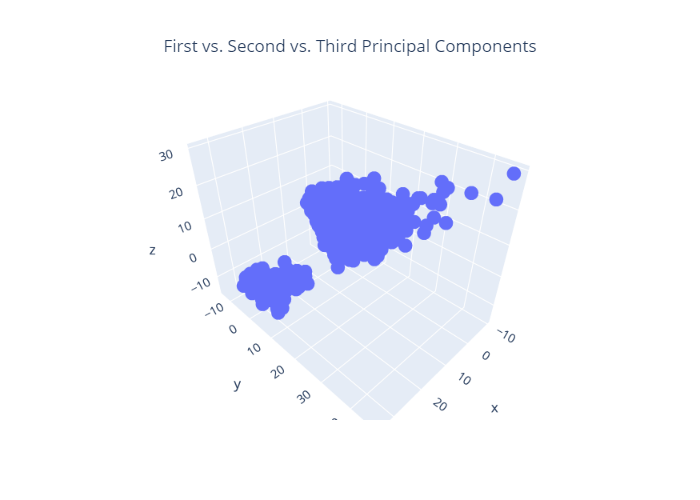

In [73]:
fig=px.scatter_3d(x=X_pca[:,0],y=X_pca[:,1],z=X_pca[:,2])
fig.update_layout(
    title={
        'text': 'First vs. Second vs. Third Principal Components',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

## 5. Finding the Clusters by KMeans Clustering

### 5.1. Finding the Optimal Number of Clusters 

First, we find the optimal number of clusters by elbow method.

In [46]:
X=X_pca
inertia=[]
for n in range (1,11):
    model=KMeans( n_clusters=n, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
    model.fit(X)
    inertia.append(model.inertia_)
print(inertia)

[850890.2744994755, 476333.78389193024, 304881.76142835827, 195970.53604160532, 159467.12466063493, 133342.03341779378, 114563.66900677774, 102277.26297952351, 92095.02336544704, 84860.29708251756]


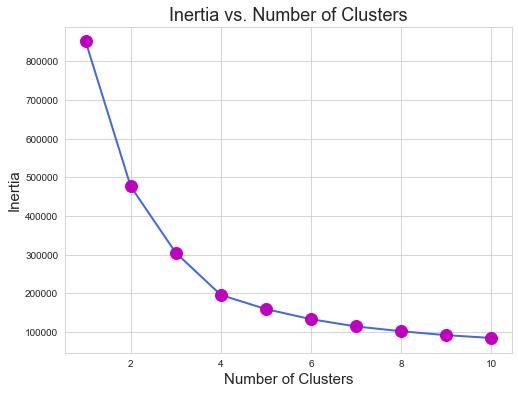

In [47]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
plt.plot(list(range(1,11)), inertia, linewidth=2, markersize=12, color='royalblue', marker='o',markerfacecolor='m', markeredgecolor='m')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.title('Inertia vs. Number of Clusters',fontsize=18)
plt.show()

We can see that if the number of clusters is smaller than 4, the inertia has a high value but if the number of clusters is larger than 4, the inertia is relatively constant. So we chose 4 as the optimal number of clusters.

### 5.2. Performing Clustering with the Optimal Number of Clusters 

In [48]:
model=KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111,algorithm='elkan')
model.fit(X)
labels=model.labels_
centers=model.cluster_centers_

In [49]:
centers

array([[32.46062709,  6.05853254, -1.69779785],
       [-1.43837569, -0.52184507, -2.73749164],
       [-3.01251106,  7.53784142,  2.34073431],
       [ 0.87235978, -5.19596792,  4.38214519]])

### 5.3. Visualizing the Clusters by Components

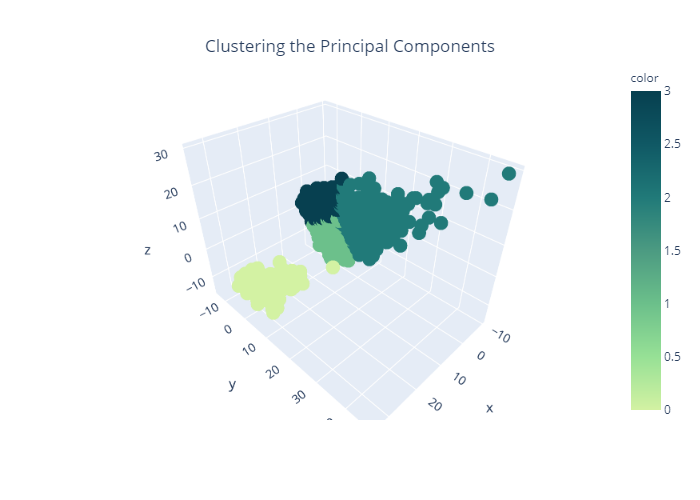

In [70]:
fig=px.scatter_3d(data_frame=df,x=X_pca[:,0],y=X_pca[:,1],z=X_pca[:,2], color=labels, color_continuous_scale='emrld')

fig.update_layout(
    title={
        'text': 'Clustering the Principal Components',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
Image(pio.to_image(fig,format='png'))

In this figure, x, y and z axes are the first, second and third Principal Components, respectively. We can now clearly observe the segmentation of separate clusters.

### 5.4. Adding PCA and K-means Results to DataFrame 

Now we create a new data frame. It allows us to add in the values of the three principal components to our data set. In addition, we also append the clusters labels to this new data frame.

In [51]:
df.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHD010,WHD020,WHQ030,WHQ040,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150
0,73557.0,8,2,1,69,4,4,1.0,107.478519,1.0,...,69.0,180.0,3.0,3.0,210.0,1.641346,270.0,200.0,270.0,62.0
1,73558.0,8,2,1,54,3,3,1.0,107.478519,2.0,...,71.0,200.0,3.0,3.0,160.0,2.000000,240.0,250.0,250.0,25.0


In [52]:
df.reset_index(inplace=True, drop=True)

In [53]:
df_components= pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

In [54]:
df_components.shape

(9777, 3)

In [55]:
df.shape

(9777, 753)

In [56]:
df_new= pd.concat([df,df_components],axis=1)

In [57]:
df_new['Cluster Label']=labels 

In [58]:
df_new.head(2)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150,Principal Component 1,Principal Component 2,Principal Component 3,Cluster Label
0,73557.0,8,2,1,69,4,4,1.0,107.478519,1.0,...,210.0,1.641346,270.0,200.0,270.0,62.0,-2.033031,-0.087259,-9.970772,1
1,73558.0,8,2,1,54,3,3,1.0,107.478519,2.0,...,160.0,2.000000,240.0,250.0,250.0,25.0,-4.375754,17.275441,8.113653,2


Finally, we should add the names of the clusters to the labels.

In [59]:
df_new['Cluster Label']=df_new['Cluster Label'].apply(lambda x:'first' if x==0  else 'second' if x==1 else 'third' if x==2 else 'fourth')

In [60]:
df_new.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,...,WHD050,WHQ070,WHD110,WHD120,WHD140,WHQ150,Principal Component 1,Principal Component 2,Principal Component 3,Cluster Label
0,73557.0,8,2,1,69,4,4,1.0,107.478519,1.000000,...,210.000000,1.641346,270.000000,200.000000,270.000000,62.000000,-2.033031,-0.087259,-9.970772,second
1,73558.0,8,2,1,54,3,3,1.0,107.478519,2.000000,...,160.000000,2.000000,240.000000,250.000000,250.000000,25.000000,-4.375754,17.275441,8.113653,third
2,73559.0,8,2,1,72,3,3,2.0,107.478519,1.000000,...,195.000000,2.000000,180.000000,190.000000,228.000000,35.000000,-0.633295,2.330473,-3.613402,second
3,73560.0,8,2,1,9,3,3,1.0,119.000000,1.914071,...,312.522579,1.641346,412.158411,568.528463,315.623464,571.309635,0.644551,-4.517791,3.079625,fourth
4,73561.0,8,2,2,73,3,3,1.0,107.478519,2.000000,...,150.000000,2.000000,150.000000,135.000000,170.000000,60.000000,0.306342,-1.041562,-3.760282,second


So, when we further reduced the dimensionality by PCA, found out that we only need 3 components, and then we clustered the data to four seperate groups which represent types of diseases that affect patients.

## Conclusion

In this notebook, we used  National Health and Nutrition Examination Survey (NHANES) datasets including demographic, socioeconomic, dietary, and health-related datasets. We performed the following steps:

-  Conducted data cleaning, imputed missing values, created new features and transformed the data into a uniform format.
-  Standardized the clean data, identified three components that explained the majority of variance in data, and performed dimensionality reduction by PCA as a preprocessing step prior to data segmentation. 
-  Determined four separate clusters as the most representative types of diseases affecting sample patients by K-means algorithm. Implemented K-means clustering and visualized clusters by principal components.